# Immersed Cylinder benchmarking



This notebook will contain all the required scripts and commands to produce the
benchmarking for the immersed cylinder case.

We expect the simulation for the `cylinder_benchmark` example have been
completed and that the resulting data is available in the `cylinder_benchmark`
subdirectory of the results folder.

![image](media/close_up.png)

The benchmarking consists of a few different sub-benchmarks:

1. Inflection point detection.
2. Backdraft region detection.
3. Leakage detection.

In [4]:
# Assign flags for debugging to alter the behaviour of the program in addition
# to the list of experiments to compare.
import os

debug = True
root_folder = "../../"
data_folder = "results/cylinder_benchmark"

# Define the list of data files and the labels to give them
baseline_experiment = "meshed"
experiments = [
    "explicit_100",
    "explicit_200",
    "explicit_400",
    "explicit_800",
]
labels = [
    "Explicit 100",
    "Explicit 200",
    "Explicit 400",
    "Explicit 800",
]

data_folder = os.path.realpath(os.path.join(root_folder, data_folder))

In [5]:
# Setup the paths for the project and load the external modules
try:
    import import_ipynb
except:
    print("import_ipynb not installed. Installing it now.")
    %pip install import_ipynb
    import import_ipynb

# Load the external modules
import sys

# Load internal modules
sys.path.append(root_folder + "scripts/modules")
from nekotop import *

# Check that the folder exists
if not os.path.exists(data_folder):
    print("The path to the results folder does not exist.")
    print("Please run the benchmark first.")
    print("\tcd NEKO_TOP_ROOT")
    print("\t./setup.sh")
    print("\t./run.sh cylinder_benchmark")
    exit(404)


# Inflection point detection

Please see the [inflection point detection notebook](inflection_points.ipynb)
for more details. Here we just execute the script and show the results.

In [6]:
# Import the inflection benchmark and run it
#
# This cell will import and run the inflection point benchmarking for all the
# data files in the folder. The benchmark will compare the data to the baseline
# and produce a plot of the inflection points for each case.

from inflection_points import inflection_benchmark

# Define the baseline
if "baseline" not in locals() or debug:
    baseline = inflection_benchmark(
        os.path.join(data_folder, baseline_experiment, "inflection.csv"))

# Run the benchmark
if "inflection" not in locals() or debug:
    inflection = []
    for i in range(len(experiments)):
        inflection.append(
            inflection_benchmark(
                os.path.join(data_folder, experiments[i], "inflection.csv")))

In [10]:
# Print the results in a easily readable format
def print_bias(benchmark):
    bias = benchmark["bias"]
    return f"{bias[0]:.3f} {bias[1]:.3f} {bias[2]:.3f}"


def print_freq(benchmark):
    freq = benchmark["max_freq"]
    return f"{freq[0]:.3f} {freq[1]:.3f} {freq[2]:.3f}"


def print_amp(benchmark):
    amp = benchmark["amplitude"]
    return f"{amp[0]:.3f} {amp[1]:.3f} {amp[2]:.3f}"


def print_layer_time(benchmark):
    i = benchmark["i_boundary"]
    return f"{benchmark['times'][i]:.3f}s"


def print_building_time(benchmark):
    i = benchmark["i_building"]
    return f"{benchmark['times'][i]:.3f}s"


print("----------------------------------------------------------------------")
print("Bias: [rad]")
print(f"\t{'Baseline':20s}: " + print_bias(baseline))
for i in range(len(inflection)):
    print(f"\t{labels[i]:20s}: " + print_bias(inflection[i]))
print("----------------------------------------------------------------------")
print("Frequency: [Hz]")
print(f"\t{'Baseline':20s}: " + print_freq(baseline))
for i in range(len(inflection)):
    print(f"\t{labels[i]:20s}: " + print_freq(inflection[i]))
print("----------------------------------------------------------------------")
print("Amplitude: [rad]")
print(f"\t{'Baseline':20s}: " + print_amp(baseline))
for i in range(len(inflection)):
    print(f"\t{labels[i]:20s}: " + print_amp(inflection[i]))
print("----------------------------------------------------------------------")
print("Layer formation time: [s]")
print(f"\t{'Baseline':20s}: " + print_layer_time(baseline))
for i in range(len(inflection)):
    print(f"\t{labels[i]:20s}: " + print_layer_time(inflection[i]))
print("----------------------------------------------------------------------")
print("Building time: [s]")
print(f"\t{'Baseline':20s}: " + print_building_time(baseline))
for i in range(len(inflection)):
    print(f"\t{labels[i]:20s}: " + print_building_time(inflection[i]))
print("----------------------------------------------------------------------")

----------------------------------------------------------------------
Bias: [rad]
	Baseline            : 0.931 0.011 -0.930
	Explicit 100        : 0.931 0.011 -0.930
----------------------------------------------------------------------
Frequency: [Hz]
	Baseline            : 0.195 0.195 0.195
	Explicit 100        : 0.195 0.195 0.195
----------------------------------------------------------------------
Amplitude: [rad]
	Baseline            : 0.066 1.749 0.066
	Explicit 100        : 0.066 1.749 0.066
----------------------------------------------------------------------
Layer formation time: [s]
	Baseline            : 1.531s
	Explicit 100        : 1.531s
----------------------------------------------------------------------
Building time: [s]
	Baseline            : 138.504s
	Explicit 100        : 138.504s
----------------------------------------------------------------------


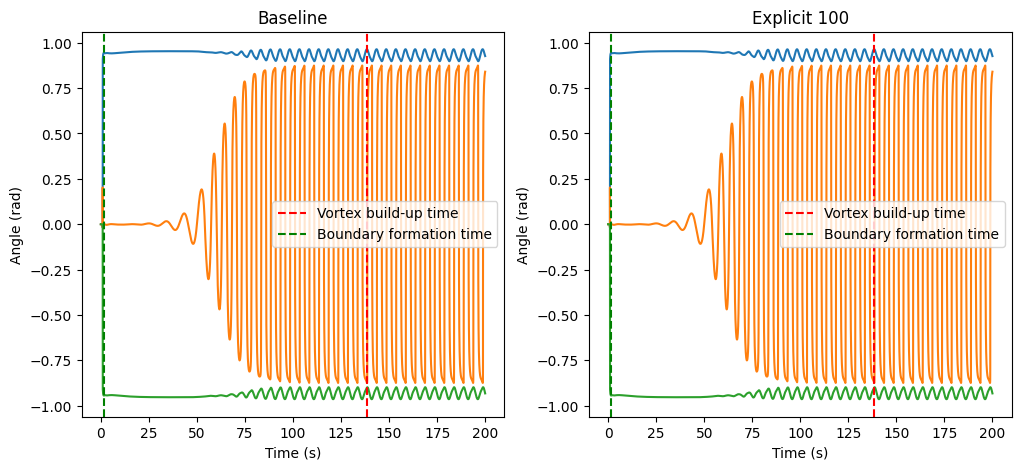

In [8]:
# Plot the results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(
    1,
    1 + len(experiments),
    figsize=(6 * (1 + len(experiments)), 5),
)

ax[0].plot(baseline["times"], baseline["angles"])

ax[0].axvline(
    baseline["times"][baseline["i_building"]],
    color="red",
    linestyle="--",
    label="Vortex build-up time",
)
ax[0].axvline(
    baseline["times"][baseline["i_boundary"]],
    color="green",
    linestyle="--",
    label="Boundary formation time",
)

ax[0].set_title("Baseline")

(x0, x1, y0, y1) = ax[0].axis()

for i in range(len(experiments)):
    ax[i + 1].plot(inflection[i]["times"], inflection[i]["angles"])
    # Add vertical lines to show the building and layer formation times
    ax[i + 1].axvline(
        inflection[i]["times"][inflection[i]["i_building"]],
        color="red",
        linestyle="--",
        label="Vortex build-up time",
    )
    ax[i + 1].axvline(
        inflection[i]["times"][inflection[i]["i_boundary"]],
        color="green",
        linestyle="--",
        label="Boundary formation time",
    )

    ax[i + 1].set_title(labels[i])

    x0 = min(x0, ax[i + 1].axis()[0])
    x1 = max(x1, ax[i + 1].axis()[1])
    y0 = min(y0, ax[i + 1].axis()[2])
    y1 = max(y1, ax[i + 1].axis()[3])

for i in range(len(ax)):
    ax[i].axis([x0, x1, y0, y1])

    ax[i].set_xlabel("Time (s)")
    ax[i].set_ylabel("Angle (rad)")
    ax[i].legend()